In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test_data = pd.read_csv('test_results.csv')

In [3]:
user_data = pd.read_csv('user_table.csv')

In [4]:
#merge data 
data = pd.merge(test_data,user_data,on="user_id")

In [5]:
data.head()

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,USA,42.89,-78.86
1,1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0,Lakeville,USA,44.68,-93.24
2,2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0,Parma,USA,41.38,-81.73
3,3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,USA,35.07,-78.90
4,4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0,Fishers,USA,39.95,-86.02


# Looking at the data as a whole I decided to start by
## 1) look at the distribution of those who converted 
## 2) decrease the dimentionality of source data
## 3) check of missing data or weird labels with source, device, and operative_system

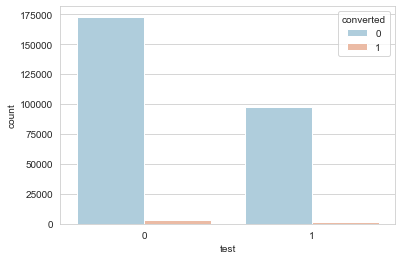

In [6]:
#address imbalanced groups between those who converted and those who did not
sns.set_style('whitegrid')
sns.countplot(x='test',hue='converted',data=data,palette='RdBu_r')

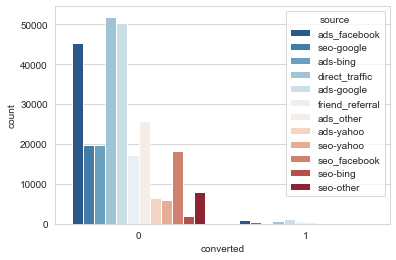

In [7]:
#sources seem similar weather you convert or not
sns.set_style('whitegrid')
sns.countplot(x='converted',hue='source',data=data,palette='RdBu_r')

In [8]:
#reduce dimentionality of source data 
data['source'] = data['source'].replace('ads_facebook','ads')
data['source'] = data['source'].replace('ads-bing','ads')
data['source'] = data['source'].replace('ads-google','ads')
data['source'] = data['source'].replace('ads_other','ads')
data['source'] = data['source'].replace('ads-yahoo','ads')

data['source'] = data['source'].replace('seo-google','seo')
data['source'] = data['source'].replace('seo_facebook','seo')
data['source'] = data['source'].replace('seo-bing','seo')
data['source'] = data['source'].replace('seo-other','seo')
data['source'] = data['source'].replace('seo-yahoo','seo')

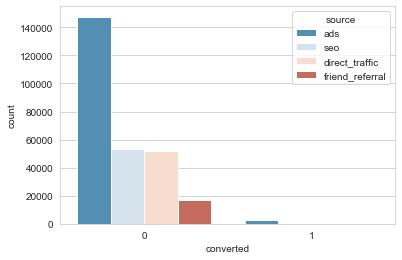

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='converted',hue='source',data=data,palette='RdBu_r')

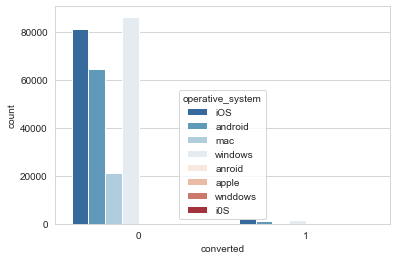

In [10]:
#address operative system labels 
sns.set_style('whitegrid')
sns.countplot(x='converted',hue='operative_system',data=data,palette='RdBu_r')

In [11]:
#combine names
data['operative_system'] = data['operative_system'].replace('anroid','android')
data['operative_system'] = data['operative_system'].replace('apple','mac')
data['operative_system'] = data['operative_system'].replace('wnddows','windows')
data['operative_system'] = data['operative_system'].replace('i0S','iOS')

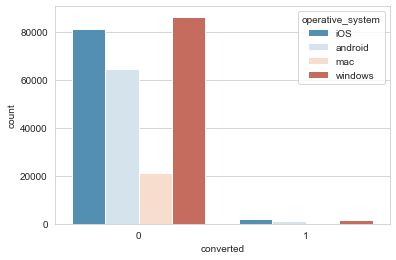

In [12]:
#address operative system labels 
sns.set_style('whitegrid')
sns.countplot(x='converted',hue='operative_system',data=data,palette='RdBu_r')

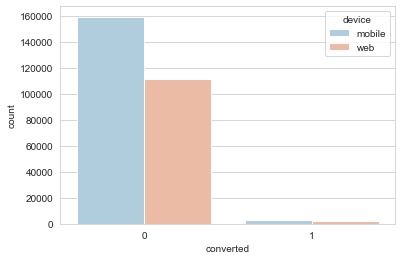

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='converted',hue='device',data=data,palette='RdBu_r')

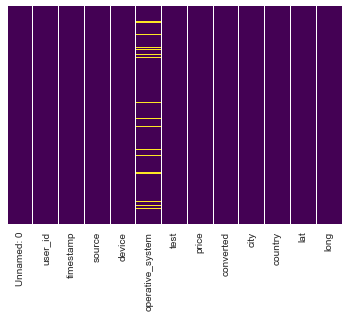

In [14]:
#see if there is missing data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#drop missing data 
data.dropna(inplace=True)

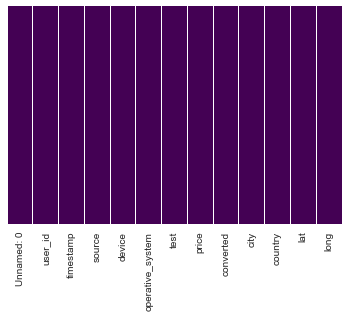

In [16]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257298 entries, 0 to 275615
Data columns (total 13 columns):
Unnamed: 0          257298 non-null int64
user_id             257298 non-null int64
timestamp           257298 non-null object
source              257298 non-null object
device              257298 non-null object
operative_system    257298 non-null object
test                257298 non-null int64
price               257298 non-null float64
converted           257298 non-null int64
city                257298 non-null object
country             257298 non-null object
lat                 257298 non-null float64
long                257298 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 27.5+ MB


In [18]:
import pyodbc
import textwrap
from numpy import nansum
from numpy import nanmean
import pandas as pd
import statsmodels.stats.api as sms
from scipy import stats as st

# The following piece of code performs series of t-test between groups and calculates revenue for the test group and the control group. The conversion rate was significantly lower for the test group (p < 0.01). The test group converted fewer people (test = 1479, control = 1862) but had a greater gross of 87261 dollars than the control group with 72618 dollars. However, other confounding factors were not taken into consideration. 

In [20]:
AB_data = data.drop(['Unnamed: 0', 'timestamp','source','device','operative_system','city','lat','long','country'], axis = 1)

In [21]:
AB_data.head()

,user_id,test,price,converted
0,604839,0,39.0,0
1,624057,0,39.0,0
2,317970,0,39.0,0
3,685636,1,59.0,0
4,820854,0,39.0,0


In [22]:
#is there a difference between those that converted that were in the test group vs. those that were not in the test group
A_test = AB_data.loc[AB_data['test']==1,'converted']
B_not_test = AB_data.loc[AB_data['test']==0,'converted']
#TODO make sure this is a representative sample 
sample_B_not_test = B_not_test.sample(n = 92345) 

In [25]:
from scipy import stats
stats.ttest_ind(A_test, sample_B_not_test, equal_var=False)

Ttest_indResult(statistic=-7.114659950309163, pvalue=1.1259986835930944e-12)

In [26]:
from scipy.stats import ttest_ind_from_stats
mean1 = np.mean(A_test)
std1 = np.std(A_test,ddof=1)
nobs1 = len(A_test)

mean2 = np.mean(sample_B_not_test)
std2 = np.std(sample_B_not_test,ddof=1)
nobs2 = len(sample_B_not_test)

ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=nobs1, mean2=mean2,std2=std2,nobs2=nobs2, equal_var=True)

Ttest_indResult(statistic=-7.114659950311242, pvalue=1.1259409946155307e-12)

In [29]:
C_T = sum(float(num) > 0 for num in A_test)
rev_for_test = C_T*59
print('number in test that converted: ',C_T)
print('revenue: $',rev_for_test)
C_NT = sum(float(num) > 0 for num in sample_B_not_test)
rev_for_no_test = C_NT*39
print('number not in test that converted: ',C_NT)
print('revenue: $',rev_for_no_test)

number in test that converted:  1479
revenue: $ 87261
number not in test that converted:  1888
revenue: $ 73632


# The test did increase revenue but conversion rate took a hit. Are there predictors we can use to the control data to help boost conversion?

In [102]:
#great a control group that converted and a control group that did not convert and put them in dataframe. 
non_test_data_not_converted = data[(data.test==0) & (data.converted==0)]
non_test_data_converted = data[(data.test==0) & (data.converted==1)]
sample_non_test_data_not_converted = non_test_data_not_converted.sample(n = 3331)

In [103]:
resample_control = non_test_data_converted.append(sample_non_test_data_not_converted)

In [104]:
resample_control.describe()

,Unnamed: 0,user_id,test,price,converted,lat,long,mobile,web,ads,direct_traffic,friend_referral,seo,android,iOS,mac,windows
count,6662.000000,6662.000000,6662.0,6.662000e+03,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000
mean,158562.623536,502344.302612,0.0,6.049901e+06,0.500000,36.990377,-94.278442,0.571600,0.428400,0.549685,0.161813,0.102372,0.186130,0.224707,0.346893,0.099670,0.328730
std,91852.036412,288335.782511,0.0,6.617852e+07,0.500038,5.295280,18.086241,0.494884,0.494884,0.497563,0.368307,0.303159,0.389241,0.417421,0.476017,0.299582,0.469787
min,13.000000,122.000000,0.0,3.900000e+01,0.000000,21.320000,-157.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78573.750000,252390.500000,0.0,3.900000e+01,0.000000,33.450000,-112.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,159816.000000,506634.500000,0.0,3.900000e+01,0.500000,37.660000,-90.010000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,237993.250000,754434.500000,0.0,3.900000e+01,1.000000,40.670000,-80.090000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,316725.000000,999864.000000,0.0,9.784738e+08,1.000000,61.180000,30.310000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
#change device to dummy and add to data
#web = 1 is web if =0 is phone so default is phone
#web = pd.get_dummies(data['device'],drop_first=True)
web = pd.get_dummies(resample_control['device'])
resample_control = pd.concat([resample_control,web],axis=1)

In [80]:
#ads is the default
source_D = pd.get_dummies(resample_control['source'])
#source_D = pd.get_dummies(data['source'],drop_first=True)
resample_control = pd.concat([resample_control,source_D],axis=1)

In [81]:
#android is the default
#OS_D = pd.get_dummies(data['operative_system'],drop_first=True)
OS_D = pd.get_dummies(resample_control['operative_system'])
resample_control = pd.concat([resample_control,OS_D],axis=1)

In [93]:
resample_control.describe()

,Unnamed: 0,user_id,test,price,converted,lat,long,mobile,web,ads,direct_traffic,friend_referral,seo,android,iOS,mac,windows
count,164953.000000,164953.000000,164953.0,1.649530e+05,164953.000000,164953.000000,164953.000000,164953.000000,164953.000000,164953.000000,164953.000000,164953.000000,164953.000000,164953.000000,164953.000000,164953.000000,164953.000000
mean,158164.132068,498945.947009,0.0,6.289587e+06,0.020194,37.091635,-93.987868,0.579414,0.420586,0.544404,0.191794,0.065437,0.198366,0.254212,0.325202,0.086455,0.334132
std,91333.834679,288591.246829,0.0,6.703858e+07,0.140663,5.199610,18.074025,0.493655,0.493655,0.498026,0.393713,0.247296,0.398770,0.435419,0.468452,0.281036,0.471687
min,0.000000,9.000000,0.0,3.900000e+01,0.000000,19.700000,-157.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79005.000000,249303.000000,0.0,3.900000e+01,0.000000,33.660000,-112.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,158365.000000,497999.000000,0.0,3.900000e+01,0.000000,37.690000,-88.550000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,237017.000000,748670.000000,0.0,3.900000e+01,0.000000,40.690000,-78.910000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,316798.000000,999999.000000,0.0,9.998843e+08,1.000000,61.180000,30.310000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
from sklearn.model_selection import train_test_split
X = resample_control[['iOS','mac','windows','direct_traffic','friend_referral','seo']]#,'iOS','mac','windows','direct_traffic','friend_referral','seo']]
y = resample_control['converted']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
logmodel = LogisticRegression()

In [146]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
predictions = logmodel.predict(X_test)

In [1]:
#'iOS','mac','windows','direct_traffic','friend_referral','seo'
#android and ads are coded as 0 
#logmodel.predict(np.array([[1,0,0,0,0,0]]))[0]

In [149]:
logmodel.score(X_test,y_test)

0.5582791395697849

In [150]:
from sklearn.metrics import classification_report
target_names = ['not converted','converted']

In [151]:
print(classification_report(y_test,predictions,target_names=target_names))

               precision    recall  f1-score   support

not converted       0.56      0.63      0.59      1010
    converted       0.56      0.49      0.52       989

     accuracy                           0.56      1999
    macro avg       0.56      0.56      0.56      1999
 weighted avg       0.56      0.56      0.56      1999



In [152]:
from sklearn.metrics import confusion_matrix

In [153]:
confusion_matrix(y_test,predictions)

array([[636, 374],
       [509, 480]])

# Targeting operating system and source may be a method to increase conversion rate in the test group which had a lower conversion rate. With a hight false negative rate the model has trouble predicting people who actually converted. Other factors may be better predictors. 